In [1]:
import sys
sys.path.append('../src')

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import tensorflow as tf

In [3]:
from gait.config import pd
from gait.utils import get_overlap_data_all_sessions,  split_test_train_by_subjects, remove_invalid_data, get_overlap_data_all_sessions
from gait.training import train_model_cnn_lstm_with_stats
from gait.evalution import save_history, save_test_history, save_accuracy_loss_figure, save_confusion_matrix_figure, compute_validations_predictions,compute_validations_predictions_with_stats


In [4]:
def compute_resultant_acceleration(X):
    return np.sqrt(X[:,:,0] **2 + X[:,:,1] ** 2 + X[:,:,2] ** 2)

def compute_resultant_gyro(X):
    return np.sqrt(X[:,:,3] **2 + X[:,:,4] ** 2 + X[:,:,5] ** 2)

def compute_resultant_angle(X):
    return np.sqrt(X[:,:,6] **2 + X[:,:,7] ** 2 + X[:,:,8] ** 2)

In [5]:
def get_std_values(X, channel):
    return X[:, :, channel].std(axis=1)


def get_mean_values(X, channel):
    return X[:, :, channel].mean(axis=1)


def get_max_values(X, channel):
    return X[:, :, channel].max(axis=1)


def get_statistic_feature_all_channels(X):
    statistic_features = []
    print(X_train.shape)
    for channel in range(9,12):
        value = get_std_values(X, channel)
        print('value shape', value.shape)
        statistic_features.append(value)
        statistic_features.append(get_mean_values(X, channel))
        statistic_features.append(get_max_values(X, channel))

    return np.vstack(statistic_features).T

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(30382, 128, 12)
value shape (30382,)
value shape (30382,)
value shape (30382,)
(30382, 128, 12)
value shape (2773,)
value shape (2773,)
value shape (2773,)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
190/190 [==============================] - 13s 25ms/step - loss: 1.0814 - accuracy: 0.5346 - val_loss: 0.9130 - val_accuracy: 0.6745
Epoch 2/50
190/190 [==============================] - 3s 18ms/step - loss: 0.9234 - accuracy: 0.6017 - val_loss: 0.8775 - val_accuracy: 0.6511
Epoch 3/50
190/190 [==============================] - 3s 18ms/step - loss: 0.8932 - accuracy: 0.6123 - val_loss: 0.8779 - val_accuracy: 0.6921
Epoch 4/50
190/190 [==============================] - 4s 18ms/step - loss: 0.8740 - accuracy: 0.6228 - val_loss: 0.8412 - val_accuracy: 0.6841
Epoch 5/50
190/190 [==============================] - 4s 20ms/step - loss: 0.8567 - accuracy: 0.6307 - val_loss: 0.8325 - val_accuracy: 0.6712
Epoch 6/50
190/190 [==============================] - 3s 17ms/step - loss: 0.8461 - accuracy: 0.6375 - val_loss: 0.7991 - val_accuracy: 0.6990
Epoch 7/50
190/190 [==============================] - 3s 17ms/step - loss: 0.8223 - accuracy: 0.6500 - val_loss: 0.8016 - val_accuracy: 0.712

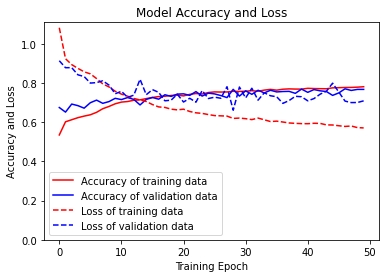

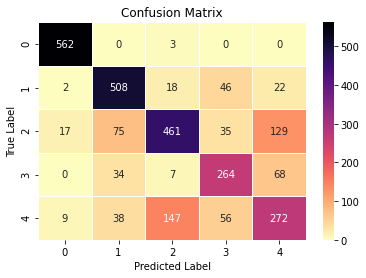

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(30958, 128, 12)
value shape (30958,)
value shape (30958,)
value shape (30958,)
(30958, 128, 12)
value shape (5900,)
value shape (5900,)
value shape (5900,)
Train y shape: (30958, 6)
trainXStats  shape: (30958, 4, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_10_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(30958, 4, 32, 12)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
194/194 [==============================] - 8s 20ms/step - loss: 1.0463 - accuracy: 0.5455 - val_loss: 0.8785 - val_accuracy: 0.6780
Epoch 2/50
194/194 [==============================] - 3s 15ms/step - loss: 0.8681 - accuracy: 0.6257 - val_loss: 0.8144 - val_accuracy: 0.6770
Epoch 3/50
194/194 [==============================] - 3s 14ms/step - loss: 0.8207 - accuracy: 0.6477 - val_loss: 0.7919 - val_accuracy: 0.7040
Epoch 4/50
194/194 [==============================] - 3s 13ms/step - loss: 0.7858 - accuracy: 0.6725 - val_loss: 0.8662 - val_accuracy: 0.6828
Epoch 5/50
194/194 [==============================] - 3s 13ms/step - loss: 0.7406 - accuracy: 0.6979 - val_loss: 0.7966 - val_accuracy: 0.6728
Epoch 6/50
194/194 [==============================] - 3s 14ms/step - loss: 0.7044 - accuracy: 0.7218 - val_loss: 0.7890 - val_accuracy: 0.7222
Epoch 7/50
194/194 [==============================] - 3s 14ms/step - loss: 0.6872 - accuracy: 0.7341 - val_loss: 0.7163 - val_accuracy: 0.7369

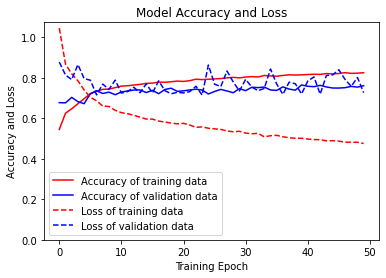

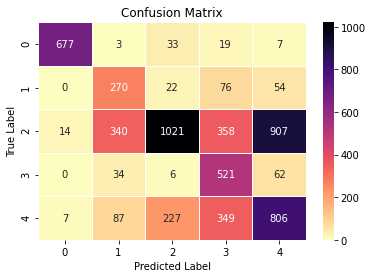

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(35947, 128, 12)
value shape (35947,)
value shape (35947,)
value shape (35947,)
(35947, 128, 12)
value shape (5563,)
value shape (5563,)
value shape (5563,)
Train y shape: (35947, 6)
trainXStats  shape: (35947, 4, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_20_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(35947, 4, 32, 12)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
225/225 [==============================] - 10s 19ms/step - loss: 1.0817 - accuracy: 0.5335 - val_loss: nan - val_accuracy: 0.6484
Epoch 2/50
225/225 [==============================] - 3s 13ms/step - loss: 0.9369 - accuracy: 0.5908 - val_loss: nan - val_accuracy: 0.6517
Epoch 3/50
225/225 [==============================] - 3s 13ms/step - loss: 0.8961 - accuracy: 0.6119 - val_loss: nan - val_accuracy: 0.6377
Epoch 4/50
225/225 [==============================] - 3s 13ms/step - loss: 0.8541 - accuracy: 0.6391 - val_loss: nan - val_accuracy: 0.6693
Epoch 5/50
225/225 [==============================] - 3s 13ms/step - loss: 0.8034 - accuracy: 0.6713 - val_loss: nan - val_accuracy: 0.6924
Epoch 6/50
225/225 [==============================] - 3s 13ms/step - loss: 0.7774 - accuracy: 0.6869 - val_loss: nan - val_accuracy: 0.6822
Epoch 7/50
225/225 [==============================] - 3s 13ms/step - loss: 0.7610 - accuracy: 0.6921 - val_loss: nan - val_accuracy: 0.7312
Epoch 8/50
225/225 

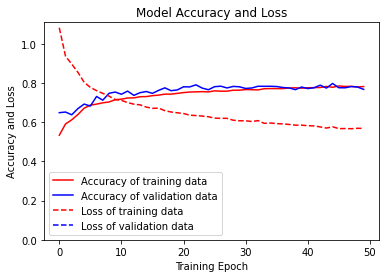

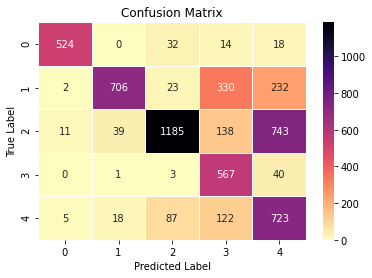

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(44425, 128, 12)
value shape (44425,)
value shape (44425,)
value shape (44425,)
(44425, 128, 12)
value shape (3089,)
value shape (3089,)
value shape (3089,)
Train y shape: (44425, 6)
trainXStats  shape: (44425, 4, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_30_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(44425, 4, 32, 12)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
278/278 [==============================] - 8s 17ms/step - loss: 1.0368 - accuracy: 0.5488 - val_loss: 0.8537 - val_accuracy: 0.6675
Epoch 2/50
278/278 [==============================] - 4s 13ms/step - loss: 0.8900 - accuracy: 0.6167 - val_loss: 0.7930 - val_accuracy: 0.6902
Epoch 3/50
278/278 [==============================] - 4s 13ms/step - loss: 0.8570 - accuracy: 0.6351 - val_loss: 0.8179 - val_accuracy: 0.6528
Epoch 4/50
278/278 [==============================] - 4s 13ms/step - loss: 0.8226 - accuracy: 0.6529 - val_loss: 0.7865 - val_accuracy: 0.6961
Epoch 5/50
278/278 [==============================] - 4s 13ms/step - loss: 0.7825 - accuracy: 0.6767 - val_loss: 0.7857 - val_accuracy: 0.6818
Epoch 6/50
278/278 [==============================] - 4s 13ms/step - loss: 0.7452 - accuracy: 0.7001 - val_loss: 0.8104 - val_accuracy: 0.6755
Epoch 7/50
278/278 [==============================] - 4s 13ms/step - loss: 0.7284 - accuracy: 0.7084 - val_loss: 0.7464 - val_accuracy: 0.7109

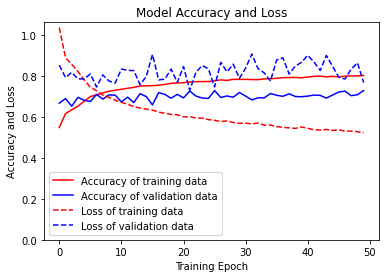

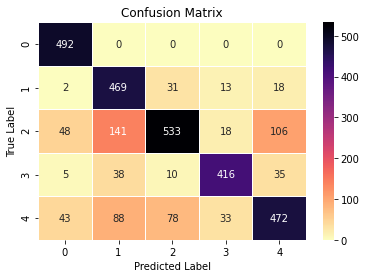

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(48504, 128, 12)
value shape (48504,)
value shape (48504,)
value shape (48504,)
(48504, 128, 12)
value shape (7027,)
value shape (7027,)
value shape (7027,)
Train y shape: (48504, 6)
trainXStats  shape: (48504, 4, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_40_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(48504, 4, 32, 12)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
304/304 [==============================] - 9s 16ms/step - loss: 1.0527 - accuracy: 0.5349 - val_loss: nan - val_accuracy: 0.6645
Epoch 2/50
304/304 [==============================] - 4s 13ms/step - loss: 0.9233 - accuracy: 0.5994 - val_loss: nan - val_accuracy: 0.6812
Epoch 3/50
304/304 [==============================] - 4s 13ms/step - loss: 0.8823 - accuracy: 0.6241 - val_loss: nan - val_accuracy: 0.6981
Epoch 4/50
304/304 [==============================] - 4s 13ms/step - loss: 0.8523 - accuracy: 0.6371 - val_loss: nan - val_accuracy: 0.7041
Epoch 5/50
304/304 [==============================] - 4s 13ms/step - loss: 0.8232 - accuracy: 0.6549 - val_loss: nan - val_accuracy: 0.7132
Epoch 6/50
304/304 [==============================] - 4s 13ms/step - loss: 0.7971 - accuracy: 0.6736 - val_loss: nan - val_accuracy: 0.7321
Epoch 7/50
304/304 [==============================] - 4s 13ms/step - loss: 0.7660 - accuracy: 0.6924 - val_loss: nan - val_accuracy: 0.7242
Epoch 8/50
304/304 [

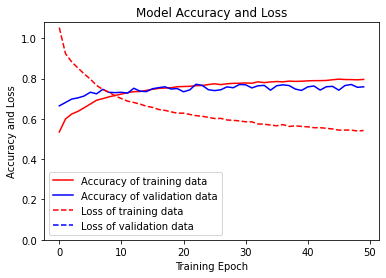

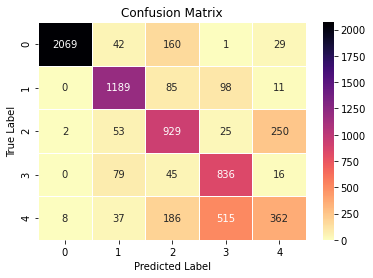

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(60956, 128, 12)
value shape (60956,)
value shape (60956,)
value shape (60956,)
(60956, 128, 12)
value shape (4798,)
value shape (4798,)
value shape (4798,)
Train y shape: (60956, 6)
trainXStats  shape: (60956, 4, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_50_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(60956, 4, 32, 12)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
381/381 [==============================] - 10s 16ms/step - loss: 0.9917 - accuracy: 0.5736 - val_loss: 0.8551 - val_accuracy: 0.6992
Epoch 2/50
381/381 [==============================] - 5s 13ms/step - loss: 0.8772 - accuracy: 0.6279 - val_loss: 0.8226 - val_accuracy: 0.6870
Epoch 3/50
381/381 [==============================] - 5s 13ms/step - loss: 0.8385 - accuracy: 0.6485 - val_loss: 0.8008 - val_accuracy: 0.6987
Epoch 4/50
381/381 [==============================] - 5s 13ms/step - loss: 0.7790 - accuracy: 0.6856 - val_loss: 0.8013 - val_accuracy: 0.6735
Epoch 5/50
381/381 [==============================] - 5s 12ms/step - loss: 0.7486 - accuracy: 0.7022 - val_loss: 0.8096 - val_accuracy: 0.6733
Epoch 6/50
381/381 [==============================] - 5s 12ms/step - loss: 0.7204 - accuracy: 0.7165 - val_loss: 0.8476 - val_accuracy: 0.6430
Epoch 7/50
381/381 [==============================] - 5s 13ms/step - loss: 0.7018 - accuracy: 0.7248 - val_loss: 0.7906 - val_accuracy: 0.687

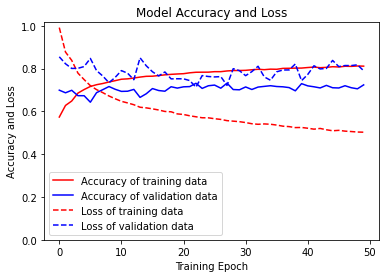

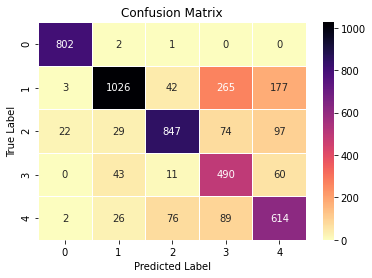

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(70662, 128, 12)
value shape (70662,)
value shape (70662,)
value shape (70662,)
(70662, 128, 12)
value shape (11546,)
value shape (11546,)
value shape (11546,)
Train y shape: (70662, 6)
trainXStats  shape: (70662, 4, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_60_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(70662, 4, 32, 12)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
442/442 [==============================] - 14s 16ms/step - loss: 0.9668 - accuracy: 0.5914 - val_loss: 0.8356 - val_accuracy: 0.6645
Epoch 2/50
442/442 [==============================] - 6s 14ms/step - loss: 0.8277 - accuracy: 0.6576 - val_loss: 0.8971 - val_accuracy: 0.6464
Epoch 3/50
442/442 [==============================] - 6s 13ms/step - loss: 0.7680 - accuracy: 0.6899 - val_loss: 0.8201 - val_accuracy: 0.6604
Epoch 4/50
442/442 [==============================] - 6s 14ms/step - loss: 0.7120 - accuracy: 0.7205 - val_loss: 0.8661 - val_accuracy: 0.6657
Epoch 5/50
442/442 [==============================] - 7s 16ms/step - loss: 0.6787 - accuracy: 0.7372 - val_loss: 0.8181 - val_accuracy: 0.6762
Epoch 6/50
442/442 [==============================] - 7s 15ms/step - loss: 0.6573 - accuracy: 0.7464 - val_loss: 0.8285 - val_accuracy: 0.6672
Epoch 7/50
442/442 [==============================] - 7s 15ms/step - loss: 0.6365 - accuracy: 0.7561 - val_loss: 0.8611 - val_accuracy: 0.666

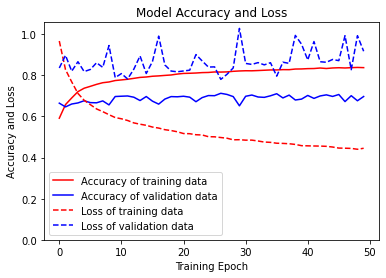

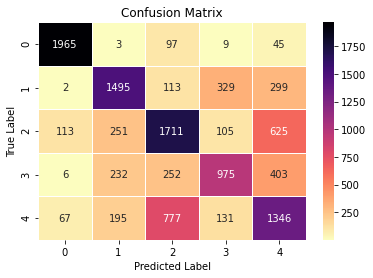

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(99487, 128, 12)
value shape (99487,)
value shape (99487,)
value shape (99487,)
(99487, 128, 12)
value shape (10101,)
value shape (10101,)
value shape (10101,)
Train y shape: (99487, 6)
trainXStats  shape: (99487, 4, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_70_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(99487, 4, 32, 12)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
622/622 [==============================] - 13s 16ms/step - loss: 0.9020 - accuracy: 0.6176 - val_loss: 0.8023 - val_accuracy: 0.6940
Epoch 2/50
622/622 [==============================] - 8s 14ms/step - loss: 0.7570 - accuracy: 0.6900 - val_loss: 0.7323 - val_accuracy: 0.7245
Epoch 3/50
622/622 [==============================] - 8s 13ms/step - loss: 0.6854 - accuracy: 0.7325 - val_loss: 0.7609 - val_accuracy: 0.7172
Epoch 4/50
622/622 [==============================] - 8s 14ms/step - loss: 0.6523 - accuracy: 0.7477 - val_loss: 0.7318 - val_accuracy: 0.7373
Epoch 5/50
622/622 [==============================] - 9s 14ms/step - loss: 0.6253 - accuracy: 0.7592 - val_loss: 0.7113 - val_accuracy: 0.7522
Epoch 6/50
622/622 [==============================] - 8s 13ms/step - loss: 0.6036 - accuracy: 0.7699 - val_loss: 0.7182 - val_accuracy: 0.7486
Epoch 7/50
622/622 [==============================] - 8s 13ms/step - loss: 0.5928 - accuracy: 0.7785 - val_loss: 0.7294 - val_accuracy: 0.747

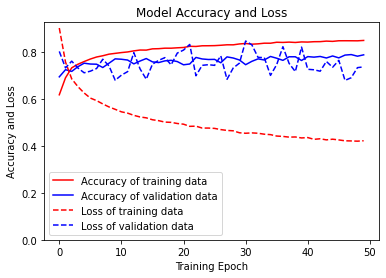

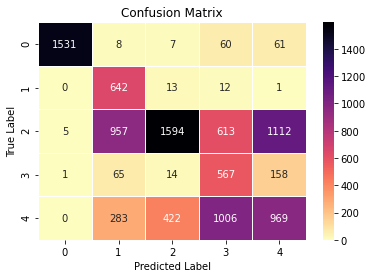

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(153269, 128, 12)
value shape (153269,)
value shape (153269,)
value shape (153269,)
(153269, 128, 12)
value shape (11106,)
value shape (11106,)
value shape (11106,)
Train y shape: (153269, 6)
trainXStats  shape: (153269, 4, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_80_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(153269, 4, 32, 12)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
958/958 [==============================] - 18s 15ms/step - loss: 0.9053 - accuracy: 0.6154 - val_loss: 0.8474 - val_accuracy: 0.6826
Epoch 2/50
958/958 [==============================] - 13s 13ms/step - loss: 0.7362 - accuracy: 0.7084 - val_loss: 0.8384 - val_accuracy: 0.6704
Epoch 3/50
958/958 [==============================] - 13s 13ms/step - loss: 0.6812 - accuracy: 0.7343 - val_loss: 0.7744 - val_accuracy: 0.6984
Epoch 4/50
958/958 [==============================] - 13s 13ms/step - loss: 0.6493 - accuracy: 0.7501 - val_loss: 0.7780 - val_accuracy: 0.6922
Epoch 5/50
958/958 [==============================] - 13s 13ms/step - loss: 0.6295 - accuracy: 0.7586 - val_loss: 0.7638 - val_accuracy: 0.7070
Epoch 6/50
958/958 [==============================] - 13s 13ms/step - loss: 0.6091 - accuracy: 0.7694 - val_loss: 0.7917 - val_accuracy: 0.6968
Epoch 7/50
958/958 [==============================] - 13s 13ms/step - loss: 0.5974 - accuracy: 0.7733 - val_loss: 0.7755 - val_accuracy:

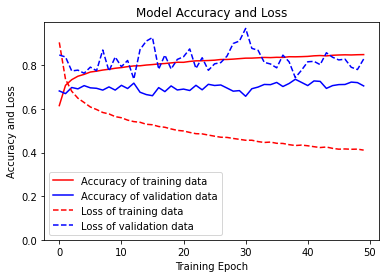

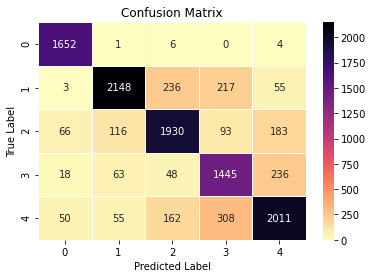

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
(314868, 128, 12)
value shape (314868,)
value shape (314868,)
value shape (314868,)
(314868, 128, 12)
value shape (13857,)
value shape (13857,)
value shape (13857,)
Train y shape: (314868, 6)
trainXStats  shape: (314868, 4, 9)
Model saved at filepath : /home/sanjeev/thesis/code/gait-deeplearning/notebooks/../src/../models/model_90_overlap/best_model.{epoch:02d}-{val_loss:.2f}.hdf5
(314868, 4, 32, 12)


/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1968/1968 [==============================] - 33s 14ms/step - loss: 0.8298 - accuracy: 0.6593 - val_loss: 0.7497 - val_accuracy: 0.7138
Epoch 2/50
1968/1968 [==============================] - 25s 13ms/step - loss: 0.6790 - accuracy: 0.7376 - val_loss: 0.7155 - val_accuracy: 0.7438
Epoch 3/50
1968/1968 [==============================] - 25s 13ms/step - loss: 0.6315 - accuracy: 0.7589 - val_loss: 0.6691 - val_accuracy: 0.7759
Epoch 4/50
1968/1968 [==============================] - 25s 13ms/step - loss: 0.6022 - accuracy: 0.7726 - val_loss: 0.6473 - val_accuracy: 0.7838
Epoch 5/50
1968/1968 [==============================] - 25s 13ms/step - loss: 0.5802 - accuracy: 0.7827 - val_loss: 0.6866 - val_accuracy: 0.7780
Epoch 6/50
1968/1968 [==============================] - 25s 13ms/step - loss: 0.5641 - accuracy: 0.7886 - val_loss: 0.6606 - val_accuracy: 0.7817
Epoch 7/50
1968/1968 [==============================] - 25s 13ms/step - loss: 0.5494 - accuracy: 0.7950 - val_loss: 0.6353 -

KeyboardInterrupt: 

In [6]:
overlapPercents = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# overlapPercents = [0]
# exclude_subjects = ['ddAeJA42PXvwthbW', 'nan', 'LLZjAPTyj7muHsEf',
#                     'MMuX9YIh4NTbLZLM', 'cbOZWnI7s1y8oLD4', 'PE8D53oX060qLbdX', 'xYdtS1F8tDyjEIgN', 'sUZBISq61Y7I5tqQ']
exclude_subjects = ['ddAeJA42PXvwthbW', 'nan', '0DXZFsYOfgqsYe0Z',
                    '0UXFxu10k0En1vDK',
                    'KNmC3LADpLyH5qJA',
                    'YbJVcb4vFFjKKlfe',
                    'ewpnQDEzR8hTqPRY', ]
for OVERLAP_PERCENT in overlapPercents:
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
    with strategy.scope():
        X, y, subjects = get_overlap_data_all_sessions(OVERLAP_PERCENT)
        # REMOVE UNWANTED SUBJECTS
        indexes = np.where(subjects == exclude_subjects)
        X = np.delete(X, indexes[0], axis=0)
        y = np.delete(y, indexes[0], axis=0)
        subjects = np.delete(subjects, indexes[0], axis=0)
        # END REMOVE UNWANTED SUBJECTS

        # AUGMENT DATA
        resultant_acc = compute_resultant_acceleration(X)
        resultant_gyro = compute_resultant_gyro(X)
        resultant_angle = compute_resultant_angle(X)
        resultant_acc = resultant_acc.reshape(
            resultant_acc.shape[0], resultant_acc.shape[1], 1)
        resultant_gyro = resultant_gyro.reshape(
            resultant_gyro.shape[0], resultant_gyro.shape[1], 1)
        resultant_angle = resultant_angle.reshape(
            resultant_angle.shape[0], resultant_angle.shape[1], 1)
        X = np.concatenate((X, resultant_acc), axis=2)
        X = np.concatenate((X, resultant_gyro), axis=2)
        X = np.concatenate((X, resultant_angle), axis=2)
        # AUGMENT DATA END

        # print('UNIQUE subjects:', np.unique(subjects))
        X_train, X_test, y_train, y_test, y_train_non_encoded, y_test_non_encoded = split_test_train_by_subjects(
            X, y, subjects, train_percent=0.9)
        X_train_stats = get_statistic_feature_all_channels(X_train)
        X_test_stats = get_statistic_feature_all_channels(X_test)

        X_train_stats = np.repeat(X_train_stats[:, :, np.newaxis], 4, axis=2)
        X_train_stats = X_train_stats.reshape(
            X_train_stats.shape[0], X_train_stats.shape[2], X_train_stats.shape[1])

        X_test_stats = np.repeat(X_test_stats[:, :, np.newaxis], 4, axis=2)
        X_test_stats = X_test_stats.reshape(
            X_test_stats.shape[0], X_test_stats.shape[2], X_test_stats.shape[1])

        model, history = train_model_cnn_lstm_with_stats(
            X_train, y_train, X_test, y_test, X_train_stats, X_test_stats, overlap_percent=OVERLAP_PERCENT, batch_size=128, epochs=50)

        n_steps, n_length = 4, 32
        X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, 12))
        evaluation_history = model.evaluate(
            [X_test, X_test_stats], y_test, batch_size=128, verbose=1)

        save_history(history, OVERLAP_PERCENT)
        save_test_history(evaluation_history, OVERLAP_PERCENT)
        save_accuracy_loss_figure(history, OVERLAP_PERCENT)
        validations, predictions = compute_validations_predictions_with_stats(
            model, X_test, y_test, X_test_stats)
        save_confusion_matrix_figure(
            validations, predictions, OVERLAP_PERCENT, sns)
